## Data Analysis : Credit Card Marketing Campaign

### Contents
* Scenario
* Dataset Description
* Objective
* A/B Testing
* Distribution of Data
* Identifying which factors Contributed
* Identifying how factors Contributed
* Steps of Hypothesis Testing
* Null Hypothesis
* Alternative Hypothesis
* Results
* Recommendations 
* Conclusion

### Scenario
* A large consumer bank, has recently run a direct marketing campaign by creating a video ad for credit card offers to acquire more credit card applications.
* During the campaign they also ran a split test for landing pages. The control page is their default text-based page, while the test page features a new marketing video. 


### Dataset Description
* Dataset Name : bank_direct_marketing.csv

* Number of rows : 100000

* Each row represents the demographics and the response of the recipients.

* Number of Variables : 12

* Variables Name:
	1. Demographics of Users : age, job, marital_status, education, gender, 
	2. Response of Users : suggested, day_of_week, test, frequency, page_views, prev_y, y

### Objective
To check A/B testing and to see if the test page(with the video ad) has performed better than control page(text base).

### Data Dictionary: 

**age** : type - Numerical
      <br>Age of the recipient.
      
**job**	: type - Nominal Categorical
      <br>Job category of the recipient.
      
**marital**	: type - Nominal Categorical
          <br>Marital status of the recipient
          
**education** : type - Nominal Categorical
            <br>education level of the recipient.
            
**gender**	: type - Nominal Categorical
              <br>Gender (male is 1, female is 0) of the recipient.
              
**suggested** : type - Nominal Categorical
            <br>Whether the recipient is outside of the bank's original targeting parameters (i.e. suggested by algorithms).
            
            
**test** : type - Nominal Categorical
           <br>Test landing page with video (control page is 0, test page is 1)	.
           
**day_of_week**	: type - Ordinal Categorical
                  <br>Day that recipient saw the ad.	
                  
**frequency**	: type - Numerical
                  <br>Number of times recipient had seen the ads from campaign.
                  
**page_views**	:	type - Numerical
                    <br>Number of pages the recipient had viewed on the bank's website in the 90 days period prior to seeing the ad.
                    
**prev_y**	: type - Nominal Categorical.
<br>Whether the recipient had applied for a credit card after receiving a previous campaign. 
<br>0-	Not applied for credit card.
<br>1-	Applied for credit card.
<br>2-	the recipient has never received a previous campaign.	

**y  (*Target variable*)** : type - Categorical 
<br>Whether the recipient applied for the card.
<br>0-	Not applied
<br>1-	Applied	Nominal 


### A/B Testing
A/B testing (also known as split testing or bucket testing) is a method of comparing two versions of a webpage or app against each other to determine which one performs better. AB testing is essentially an experiment where two or more variants of a page are shown to users at random, and statistical analysis is used to determine which variation performs better for a given conversion goal.

### A/B Testing Working
In an A/B test, you take a webpage or app screen and modify it to create a second version of the same page. This change can be as simple as a single headline or button, or be a complete redesign of the page. Then, half of your traffic is shown the original version of the page (known as the control) and half are shown the modified version of the page (the variation).
<br>As visitors are served either the control or variation, their engagement with each experience is measured and collected in an analytics dashboard and analyzed through a statistical engine. You can then determine whether changing the experience had a positive, negative, or no effect on visitor behavior.

### Why to use A/B Test
A/B testing allows individuals, teams, and companies to make careful changes to their user experiences while collecting data on the results. This allows them to construct hypotheses, and to learn better why certain elements of their experiences impact user behavior. In another way, they can be proven wrong—their opinion about the best experience for a given goal can be proven wrong through an A/B test.

<br> More than just answering a one-off question or settling a disagreement, AB testing can be used consistently to continually improve a given experience, improving a single goal like conversion rate over time.


### Distribution of Data
<br>- Univariate Analysis of Variables to understand the overall distribution of data.
<br>- Also to understand what kind of recipients are included in the campaign.

In [1]:
# importing necessary libraries.
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import math

In [2]:
# Set the working directory
import os
os.chdir("C:\\Users\\pooja\\Desktop\\ML Final")
df=pd.read_csv('bank_direct_marketing.csv')
df.head() #display the top 5 rows of the dataset

,age,job,marital,education,gender,suggested,test,day_of_week,frequency,page_views,prev_y,y
0,43,management,married,high.school,0.0,0.0,1,wed,3,0,2,0
1,34,housemaid,married,high.school,1.0,0.0,1,mon,2,0,2,0
2,27,services,single,school dropout,1.0,0.0,1,tue,1,0,0,0
3,52,services,married,high.school,0.0,0.0,1,tue,0,0,2,0
4,31,blue-collar,married,school dropout,1.0,0.0,1,thu,1,0,2,0


In [3]:
df.shape #(number of rows, number of columns)

(100000, 12)

### Age :

In [4]:
df.age.describe()

count    100000.000000
mean         40.008280
std          10.443041
min          16.000000
25%          32.000000
50%          38.000000
75%          47.000000
max          99.000000
Name: age, dtype: float64

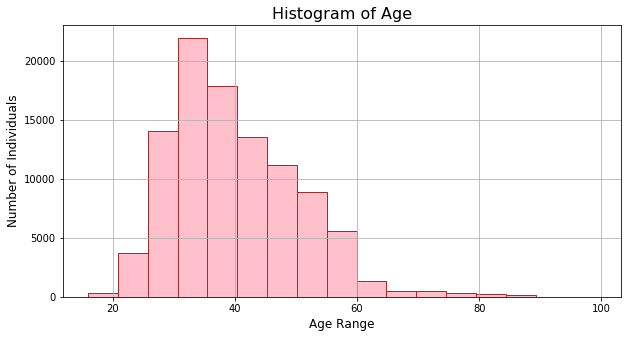

In [5]:
df.hist(column='age',
          grid=True,
          figsize=(10,5),
          color='pink',
          edgecolor='brown', #edge to separate the bars of histogram
          bins=17) 

plt.xlabel('Age Range',fontsize=12) #y-xis label
plt.ylabel('Number of Individuals', fontsize=12) #y-axis label
plt.title('Histogram of Age', fontsize=16) #title of the graph

plt.show()

#### Observations :
Almost **83%** of the recipients belong to the age group of *20-50 years*.

### Marital Status :

In [6]:
df.marital.describe()

count      100000
unique          4
top       married
freq        60533
Name: marital, dtype: object

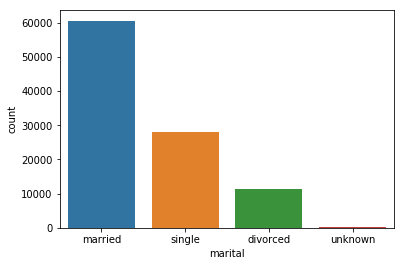

In [60]:
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('Marital Status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Observations :
Also practically depending upon the population of the age group, campaign population mostly covers the *'Single'* and *'Married'* class of the people.

### Gender :

In [22]:
df.gender.describe()

count    97595.000000
mean         0.537189
std          0.498618
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

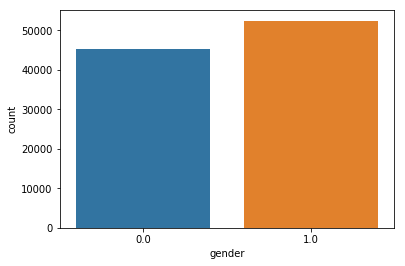

In [83]:
sns.countplot(x = 'gender', data = df)
ax.set_xlabel('Gender', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Male Female Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Observations :
Recipients of both the genders are almost equally included in the campaign.

### Day of Week :

In [25]:
df.day_of_week.describe()

count     100000
unique         5
top          thu
freq       20919
Name: day_of_week, dtype: object

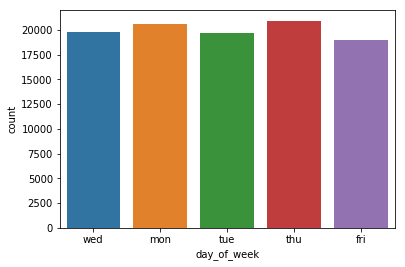

In [58]:
sns.countplot(x = 'day_of_week', data = df)
ax.set_xlabel('Day_of_Week', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Day_of_Week Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Observations :
<br>- Being the US based bank only weekdays (i.e.Monday to Friday) are included in the campaign.
<br>- All the days have almost equal response being recorded from the campaign (i.e. 20% each).
<br><br>**Note : All the above variables are not giving any significant results for understanding users response to the campaign.**

### Education Sector :
<br>- To remove some unnecessary and duplicate categories of the ***'education'*** variable we created a new categorical variable named ***'education Sector'*** consisting of 4 categories.

In [90]:
#Category crration for 'Education' variable
df["education_sector"]= np.where(df.education == "high.school"  , "School", 
np.where(df.education == "school dropout"  , "School", 
(np.where(df.education =="university.degree" , "Graduate" ,
(np.where(df.education =="professional.course" , "Graduate",
(np.where(df.education =="illiterate" , "Illiterate" ,"Unknown"))))))))

In [91]:
df.head() #to view data after addition of extra column

,age,job,marital,education,gender,suggested,test,day_of_week,frequency,page_views,prev_y,y,education_sector
0,43,management,married,high.school,0.0,0.0,1,wed,3,0,2,0,School
1,34,housemaid,married,high.school,1.0,0.0,1,mon,2,0,2,0,School
2,27,services,single,school dropout,1.0,0.0,1,tue,1,0,0,0,School
3,52,services,married,high.school,0.0,0.0,1,tue,0,0,2,0,School
4,31,blue-collar,married,school dropout,1.0,0.0,1,thu,1,0,2,0,School


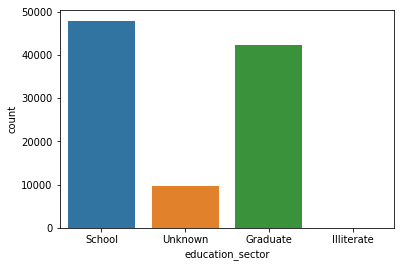

In [92]:
sns.countplot(x = 'education_sector', data = df)
ax.set_xlabel('Education_Sector', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Sector Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Observation :
<br>- The recipients having *'School'* and *'Graduate'* level of education are majorly included in the campaign, which includes upto **91%** of the campaign population.

### Job Sector :
<br>- To remove some unnecessary and duplicate categories of the ***'job'*** variable we created a new categorical variable named ***'job Sector'*** consisting of 5 categories. The categories are formed based on the distribution of data in the original ***'job'*** variable.
<br>- This simplifies handling and working on the categories of variables.

In [93]:
df["job_sector"]= np.where(df.job == "management"  , "Self Employed", 
np.where(df.job == "entrepreneur"  , "Self Employed", 
(np.where(df.job =="self-employed" , "Self Employed" ,
(np.where(df.job =="housemaid" , "Low-income",
(np.where(df.job =="blue-collar" , "Low-income" ,
(np.where(df.job =="services" , "Mid-income" ,
(np.where(df.job =="admin.", "Mid-income" ,
(np.where(df.job =="technician" , "Mid-income" ,
(np.where(df.job =="unemployed" , "No income" ,
(np.where(df.job =="retired" , "No income" ,
(np.where(df.job =="student" , "No income" , "Unknown"))))))))))))))))))))

In [94]:
df.job_sector.describe()

count         100000
unique             5
top       Mid-income
freq           51380
Name: job_sector, dtype: object

In [95]:
df.head() #to view data after addition of extra column

,age,job,marital,education,gender,suggested,test,day_of_week,frequency,page_views,prev_y,y,education_sector,job_sector
0,43,management,married,high.school,0.0,0.0,1,wed,3,0,2,0,School,Self Employed
1,34,housemaid,married,high.school,1.0,0.0,1,mon,2,0,2,0,School,Low-income
2,27,services,single,school dropout,1.0,0.0,1,tue,1,0,0,0,School,Mid-income
3,52,services,married,high.school,0.0,0.0,1,tue,0,0,2,0,School,Mid-income
4,31,blue-collar,married,school dropout,1.0,0.0,1,thu,1,0,2,0,School,Low-income


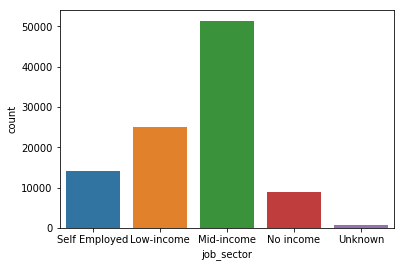

In [96]:
sns.countplot(x = 'job_sector', data = df)
ax.set_xlabel('Job_Sector', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Sector Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Observations :
<br>- **76%** of the campaign population includes *'mid'* and *'low'* income recipients.

### Frequency :

In [38]:
df.frequency.describe()

count    100000.000000
mean          2.140050
std           2.803807
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          56.000000
Name: frequency, dtype: float64

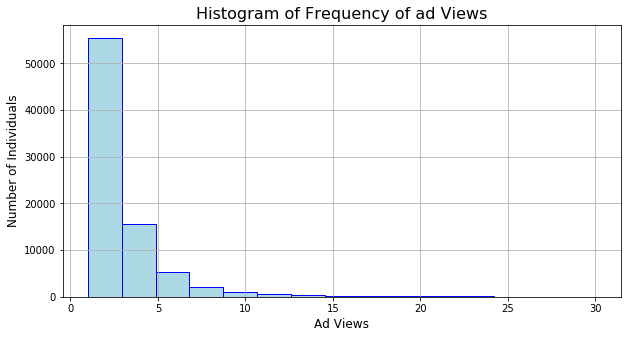

In [40]:
df.hist(column='frequency',
          grid=True,
          figsize=(10,5),
          color='lightblue',
          edgecolor='blue',
          range=[1,30], #edge to separate the bars of histogram
          bins=15) 

plt.xlabel('Ad Views',fontsize=12) #y-xis label
plt.ylabel('Number of Individuals', fontsize=12) #y-axis label
plt.title('Histogram of Frequency of ad Views', fontsize=16) #title of the graph

plt.show()

#### Observation : 
<br>- **84%** of the recipients have either not viewed the campaign ad or have viewed the ad maximum upto 3 times. 

### Page Views :

In [41]:
df.page_views.describe()

count    100000.000000
mean          0.224190
std           1.353199
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: page_views, dtype: float64

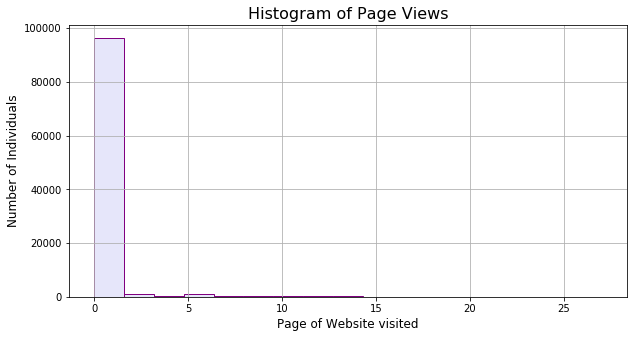

In [42]:
df.hist(column='page_views',
          grid=True,
          figsize=(10,5),
          color='lavender',
          edgecolor='purple', #edge to separate the bars of histogram
          bins=17) 

plt.xlabel('Page of Website visited',fontsize=12) #y-xis label
plt.ylabel('Number of Individuals', fontsize=12) #y-axis label
plt.title('Histogram of Page Views', fontsize=16) #title of the graph

plt.show()

#### Observations : 
<br>- **96.5%** of the recipients of the population have either not at all visited the bank's official website or have browsed upto 2 pages of the website which is a huge section of the recipients.

### Previous Y

In [43]:
df.prev_y.describe()

count    100000.000000
mean          1.758620
std           0.625428
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: prev_y, dtype: float64

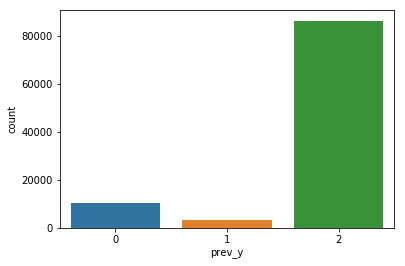

In [53]:
sns.countplot(x = 'prev_y', data = df)
ax.set_xlabel('Previous Y', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Previous_Y Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Observations :
<br>- This variable represents the response of the customers to previous campaign.
<br>- Approximately only **14%** of the population is only the known population (i.e. who's previous campaign response was recorded).
<br>- And a complete **86%** of the campaign population is a new and unknown population.                                      

### Test 

In [45]:
df.test.describe()

count    100000.000000
mean          0.634540
std           0.481561
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: test, dtype: float64

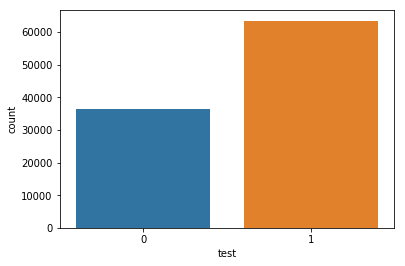

In [54]:
sns.countplot(x = 'test', data = df)
ax.set_xlabel('Control and Test', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Test Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Observations :
<br>- The split test is not equal.
<br>- **63.5k** of the campaign population was sent the test(i.e. Video based link) and only **36.5k** of the campaign population was sent the control(i.e. text based link)

### Y (Campaign Success):

In [48]:
df.y.describe()

count    100000.000000
mean          0.112230
std           0.315651
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: y, dtype: float64

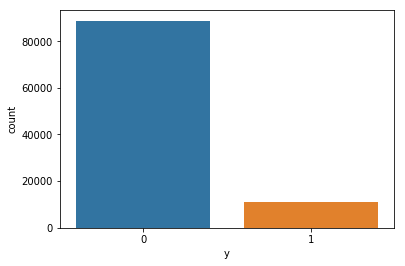

In [52]:
sns.countplot(x = 'y', data = df)
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Y Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Observations :
<br>- The overall success rate of the campaign is **11.2%**

### Identifying which factors Contributed
#### Education Sector Success Rate Distribution
<br>- To understand the factors which really affected the recipients response we considered the variables which actually showed us some significant distribution of data.
<br>- So the variables which were showing some significant differences were *'Education_Sector'* and *'Job_Sector'*

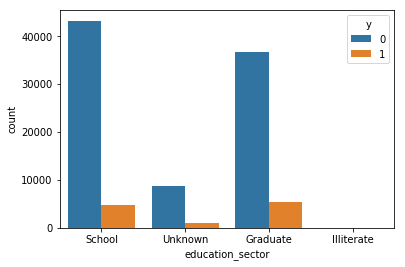

In [63]:
sns.countplot(x='',hue=('y'),data=bank_df)

#### Observations :
<br>- All the sectors are showing **10-14%** of success rate.

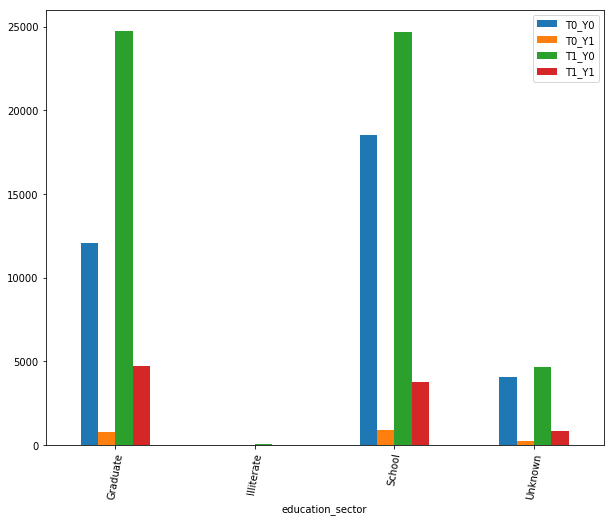

In [76]:
cross_education= pd.crosstab(df.education_sector,columns=[df.test,df.y] )
cross_education.columns=["T0_Y0","T0_Y1","T1_Y0","T1_Y1"]
cross_education.plot.bar(rot=80,figsize=(10,8))

#### Observations :
<br>- Based on the split test behaviour, test showed **15-20%** success rate, whereas control showed **4-6%** success rate.

#### JobSector Success Rate Distribution

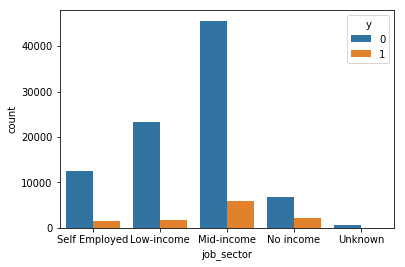

In [64]:
sns.countplot(x='job_sector',hue=('y'),data=df)

#### Observations :
<br>- Almost same success rate as that education sector, showing **10-14%** overall success rate.  

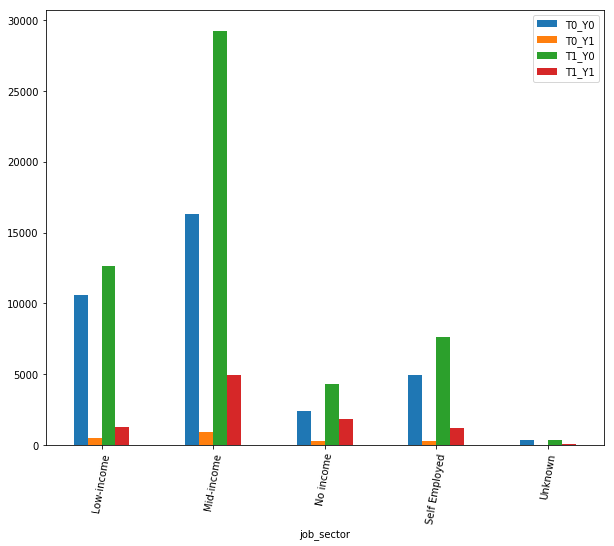

In [68]:
cross_job= pd.crosstab(df.job_sector,columns=[df.test,df.y] )
cross_job.columns=["T0_Y0","T0_Y1","T1_Y0","T1_Y1"]
cross_job.plot.bar(rot=80,figsize=(10,8))

#### Observations :
<br>- Success for test is **15-20%** and almost **5-8%** for control.

In [73]:
dfcd= pd.crosstab([df.job_sector,df.education_sector,df.test], df.y)
dfcd.columns= ["Failure","Success"]
dfcd["Success%"]= (dfcd.Success/ ((dfcd.Failure) +  (dfcd.Success)))*100
dfcd

Failure  Success    Success%
job_sector    education_sector test                              
Low-income    Graduate         0         664       41    5.815603
                               1         956      142   12.932605
              Illiterate       0           5        0    0.000000
                               1          17        0    0.000000
              School           0        7756      356    4.388560
                               1        9319      908    8.878459
              Unknown          0        2192      106    4.612707
                               1        2335      236    9.179308
Mid-income    Graduate         0        7561      452    5.640834
                               1       17091     3132   15.487316
              Illiterate       1           2        0    0.000000
              School           0        7662      376    4.677781
                               1       10905     1573   12.606187
              Unknown          0        1086       48    4.232804
                               1        1263      229   15.348525
No income     Graduate         0         812       74    8.352144
                               1        1429      494   25.689028
              Illiterate       0           0        3  100.000000
                               1           2        3   60.000000
              School           0        1419      134    8.628461
                               1        2357     1084   31.502470
              Unknown          0         176       31   14.975845
                               1         520      255   32.903226
Self Employed Graduate         0        2973      182    5.768621
                               1        5203      914   14.941965
              Illiterate       1           9        3   25.000000
              School           0        1535       54    3.398364
                               1        1996      183    8.398348
              Unknown          0         425       29    6.387665
                               1         394       97   19.755601
Unknown       Graduate         0          46        6   11.538462
                               1          67       22   24.719101
              School           0         156        3    1.886792
                               1         128       14    9.859155
              Unknown          0         170       13    7.103825
                               1         146       26   15.116279

#### Observations :
<br>- Nesting the Education_Sector within the job sector has also given normal success rate based on the number of recipients actually present in the respective sector. So higher the number of recipients success rate is normal, less the number of recipients success rate is high.
<br>- Therefore for studing the actual factors which contributed to success of campaign no significant observations can be drawn from job_sector and education_sector.

#### Page Views success rate Distribution

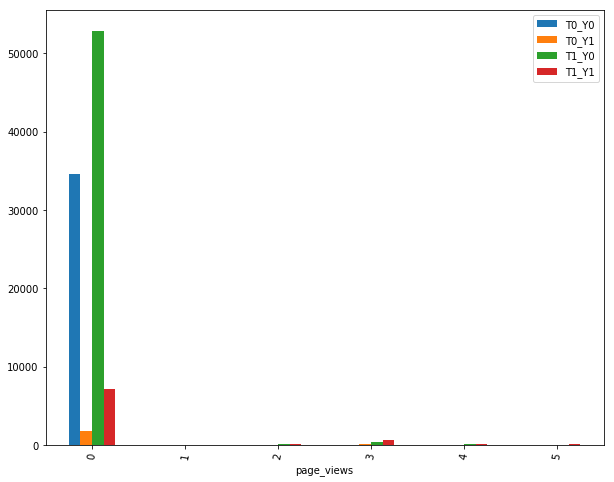

In [78]:
cross_job= pd.crosstab(df.page_views[df.page_views<=5],columns=[df.test,df.y] )
cross_job.columns=["T0_Y0","T0_Y1","T1_Y0","T1_Y1"]
cross_job.plot.bar(rot=80,figsize=(10,8))

#### Observations : 
<br>- So clearly Majority of campaign population **(i.e. 96%)** has not at all visited the bank's official website.
<br>- The success rate here for test is **12%** and that for control is **4.78%**.
<br>- Whereas the success rate of test for recipients who have visited at least one webpage of the bank's website is **63.28%**. But the difference between both the above counts is huge.

#### Ad views Frequency success rate

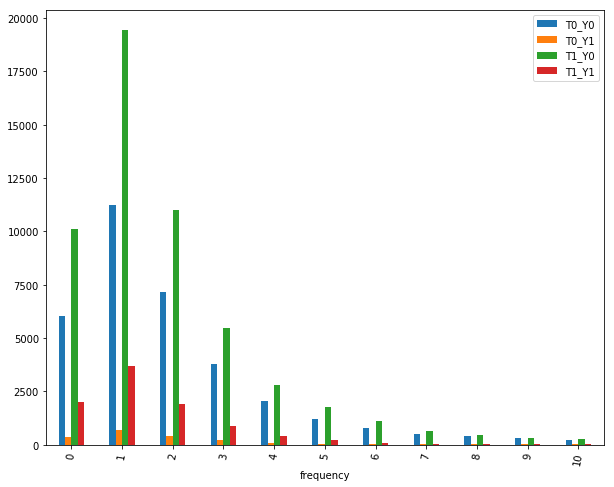

In [80]:
cross_job= pd.crosstab(df.frequency[df.frequency<=10],columns=[df.test,df.y] )
cross_job.columns=["T0_Y0","T0_Y1","T1_Y0","T1_Y1"]
cross_job.plot.bar(rot=80,figsize=(10,8))

#### Observations :
<br>- **35%** of the campaign population has viewed the ad once, here the success rate of test is **16%** and that of control is **5.65%**
<br>- For recipients who have viewEd the ad more than once the success rate is approximately **12-14%** and that for control is approx **4-5%**. But such recipients are very less compared to who have viewed the ad maximum once.


### Steps of A/B Testing

<img src="steps.png"
     alt="Steps of A/B Testing"
     style="float: left; margin-right: 10px;" />
     
<img src="Hypo.png"
     alt="Algo of A/B Testing"
     style="float: left; margin-right: 10px;" />

In [8]:
cross_tab= pd.crosstab(df.gender,columns=[df.y,df.test] )
cross_tab.columns=["T0_fail","T1_fail","T0_success","T1_success"]
cross_tab

,T0_fail,T1_fail,T0_success,T1_success
gender,,,,
0.0,17408,22846,980,3934
1.0,16221,30165,890,5151


In [9]:
t_1= df[df["test"]==1]
t_0= df[df["test"]==0]
t_0.count()
t_1.count()
t_0.count()


age            36546
job            36546
marital        36546
education      36546
gender         35499
suggested      35499
test           36546
day_of_week    36546
frequency      36546
page_views     36546
prev_y         36546
y              36546
dtype: int64

In [10]:
# undo these two comments if needed , looks like it is not needed
#t1_y1= pd.crosstab([t_1.test==1], df.y==1)
total_t1= pd.crosstab([t_1.test==1], df.y)
total_t1.columns= ["t1_failure","t1_success"]
#t0_y0= pd.crosstab([t_0.test==0], df.y==1)
total_t0= pd.crosstab([t_0.test==0], df.y)
total_t0.columns= ["t0_failure","t0_success"]

In [12]:
total_t0

,t0_failure,t0_success
test,,
True,34638,1908


In [13]:
total_t1

,t1_failure,t1_success
test,,
True,54139,9315


In [15]:
page_views_tab= pd.crosstab(df.page_views,columns=[df.y,df.test] )
page_views_tab.columns=["T0_fail","T1_fail","T0_success","T1_success"]
page_views_tab.sum()

T0_fail       34638
T1_fail       54139
T0_success     1908
T1_success     9315
dtype: int64

In [16]:
page_views_tab_t0=1735/(34536+1735)
page_views_tab_t0

0.04783435802707397

In [18]:
page_views_tab_t7162/(7162+52888)
page_views_tab_t1

0.11926727726894255

In [22]:
prey_tab= pd.crosstab(df.prev_y,columns=[df.y,df.test] )
prey_tab.columns=["T0_fail","T1_fail","T0_success","T1_success"]
prey_tab

,T0_fail,T1_fail,T0_success,T1_success
prev_y,,,,
0,632,8275,86,1409
1,90,1101,160,1983
2,33916,44763,1662,5923


In [26]:
preyyt1= (prey_tab.T1_success/(prey_tab.T1_success+ prey_tab.T1_fail))
preyyt1=preyyt1[0]
preyyt1

0.14549772821148285

In [25]:
preyyt0= (prey_tab.T0_success/(prey_tab.T0_success+ prey_tab.T0_fail))
preyyt0=preyyt0[0]
preyyt0

0.11977715877437325

In [27]:
zscorepy=((preyyt1)-preyyt0)/(((preyyt0*.95/86264))**0.5)
#zscorepy=zscore.values[0]
zscorepy
#33916+44763+1662+5923b

22.39476808331826